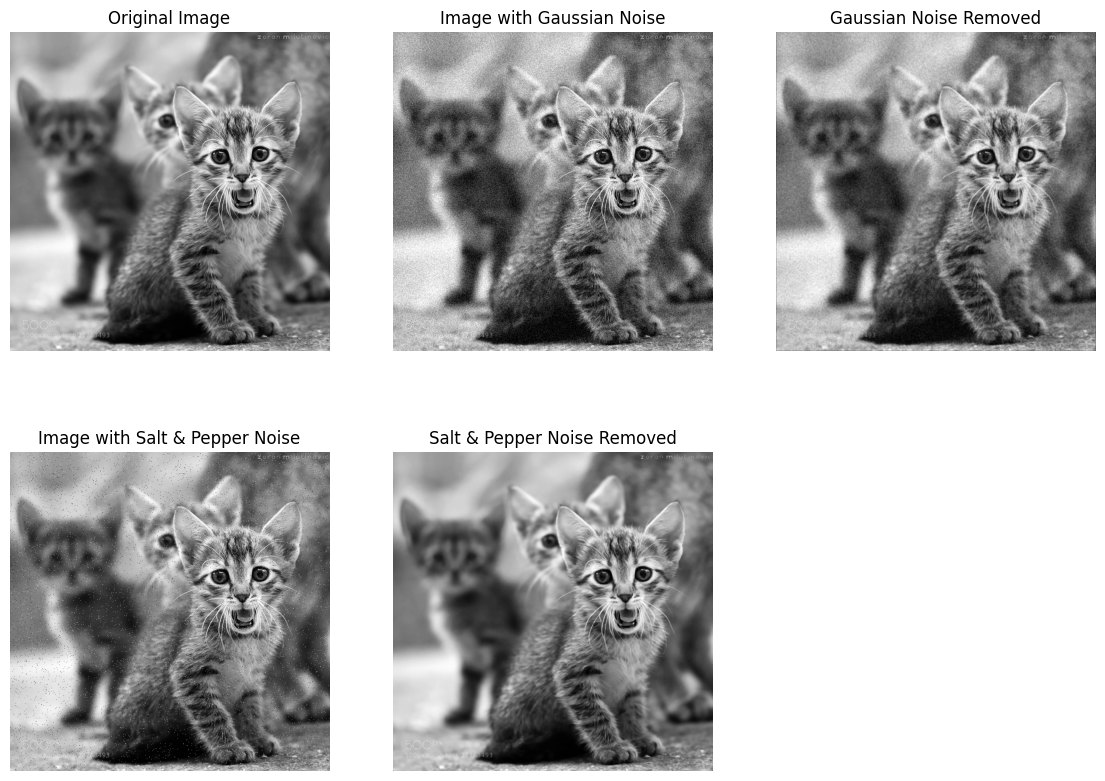

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def gaussian_noise(image, mean=0, sigma=25):
    """Add Gaussian noise to an image."""
    noise = np.random.normal(mean, sigma, image.shape)
    noisy_image = np.clip(image + noise, 0, 255)
    return noisy_image

def salt_and_pepper_noise(image, salt_amount=0.01, pepper_amount=0.01):
    """Add salt and pepper noise to an image."""
    noisy_image = np.copy(image)
    num_salt = int(image.size * salt_amount)
    num_pepper = int(image.size * pepper_amount)

    # Adding salt noise
    coords_salt = [np.random.randint(0, i - 1, num_salt) for i in image.shape]
    noisy_image[coords_salt[0], coords_salt[1]] = 255

    # Adding pepper noise
    coords_pepper = [np.random.randint(0, i - 1, num_pepper) for i in image.shape]
    noisy_image[coords_pepper[0], coords_pepper[1]] = 0

    return noisy_image


def mean_filter(image, size=3):
    """Apply a mean filter to the image."""
    pad = size // 2
    padded_image = np.pad(image, pad, mode='constant', constant_values=0)
    result = np.zeros_like(image)

    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            region = padded_image[x:x+size, y:y+size]
            result[x, y] = np.mean(region)

    return result

def median_filter(image, size=3):
    """Apply a median filter to the image."""
    pad = size // 2
    padded_image = np.pad(image, pad, mode='constant', constant_values=0)
    result = np.zeros_like(image)

    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            region = padded_image[x:x+size, y:y+size]
            result[x, y] = np.median(region)

    return result

# Load image
img_path = '/content/cat.jpg'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

# Add Gaussian Noise and Apply Mean Filter
noisy_gaussian_img = gaussian_noise(img)
filtered_gaussian_img = mean_filter(noisy_gaussian_img)

# Add Salt & Pepper Noise and Apply Median Filter
noisy_salt_pepper_img = salt_and_pepper_noise(img)
filtered_salt_pepper_img = median_filter(noisy_salt_pepper_img)

# Display results
plt.figure(figsize=(14, 10))

plt.subplot(2, 3, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.title('Image with Gaussian Noise')
plt.imshow(noisy_gaussian_img, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.title('Gaussian Noise Removed')
plt.imshow(filtered_gaussian_img, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.title('Image with Salt & Pepper Noise')
plt.imshow(noisy_salt_pepper_img, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.title('Salt & Pepper Noise Removed')
plt.imshow(filtered_salt_pepper_img, cmap='gray')
plt.axis('off')

plt.show()



#*Conclusion*

1-Effectiveness of Mean Filtering on Gaussian Noise:

i-Gaussian Noise: This type of noise is characterized by a normal distribution of pixel intensity values, creating a smooth, random variation across the image.

ii-Mean Filtering: Mean filtering averages the pixel values within a defined neighborhood (e.g., 3x3 mask). This smoothing effect reduces the high-frequency components of Gaussian noise, resulting in a more uniform and less noisy image.

iii-Conclusion: Mean filtering is effective in reducing Gaussian noise due to its averaging nature, which smooths out the noise by blurring the image. However, it can also blur important image details and edges.

2-Effectiveness of Median Filtering on Salt-and-Pepper Noise:

i-Salt-and-Pepper Noise: This noise type consists of random occurrences of white and black pixels, often appearing as "salt" (white pixels) and "pepper" (black pixels) scattered across the image.

ii-Median Filtering: Median filtering replaces the center pixel's value in the neighborhood with the median value of the surrounding pixels. This non-linear filtering method effectively removes outliers, such as the extreme black and white values in salt-and-pepper noise, without blurring the image.

iii-Conclusion: Median filtering is highly effective in removing salt-and-pepper noise because it eliminates the extreme pixel values while preserving image edges and details. Unlike mean filtering, median filtering does not introduce blurring, making it more suitable for noise types with sharp, distinct outliers.

Overall Observation:

Mean Filtering is best suited for images affected by Gaussian noise, where the goal is to smooth out the image by reducing high-frequency variations.
Median Filtering excels in removing salt-and-pepper noise, preserving image details and edges while effectively eliminating the noise.
This experiment highlights the importance of selecting the appropriate filtering technique based on the type of noise present in the image. Using the wrong filter could either fail to remove the noise effectively or unnecessarily degrade the quality of the image by blurring important features.